<b>Arnie Larson<br/>
Some plotting stuff<br/>
Winter 2023<br/>
</b>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
# See documentation here: https://docs.scipy.org/doc/scipy/tutorial/fft.html
from scipy.fft import fft, fftfreq
from scipy import signal
import os

In [2]:
# 1 - calculate the wavenumber k and wavelength for a few sources/mediums
# middle C: 261 Hz; bat echo location ~20kHz; ultrasound ~ 3MHz; 
# for c = 1500 m/s (water) and 343 m/s (air)


In [4]:
t = np.linspace(0,2*np.pi,256)

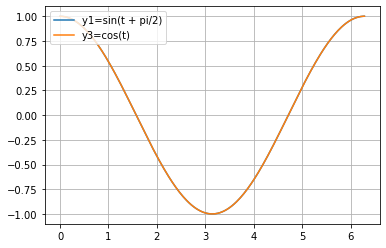

In [5]:
y1=np.sin(t + np.pi/2)
#y2=np.sin(t+np.pi/2)
y3=np.cos(t)
plt.plot(t,y1,label="y1=sin(t + pi/2)")
#plt.plot(t,y2,label="y2=sin(t+90)")
plt.plot(t,y3,label="y3=cos(t)")
plt.legend(loc="upper left")
plt.grid(True)

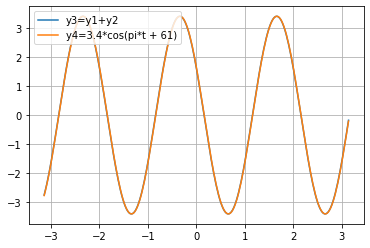

In [29]:
# Validation EM HW1, Problem 7, Phasor addition
y1=-np.sin(np.pi*t+3*np.pi/18)
y2=3*np.cos(np.pi*t+4.5*np.pi/18)
y3=y1+y2
y4=3.4*np.cos(np.pi*t+61*np.pi/180)
plt.plot(t,y3,label="y3=y1+y2")
plt.plot(t,y4,label="y4=3.4*cos(pi*t + 61)")
plt.legend(loc="upper left")
plt.grid(True)

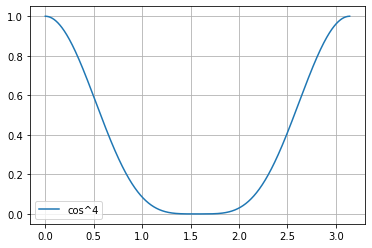

In [33]:
t2 = np.linspace(0,np.pi,1024)
G = np.power(np.cos(t2),4)
plt.plot(t2,G,label="cos^4")
plt.legend(); plt.grid(True)

### Section of FFTs and Power Spectrum Density

- Some notes on discrete FFTs
- Parseval's Theroem
- Loading and examining a real data set
- Plot the full (negative frequencies FFT, real and imaginary)
- Plot the FFT Energy (abs value) over positive frequencies
- Plot the SPD

In [6]:
# load csv data into np arrays; note numpy has a getfromtxt() function that should probably be used
# hard coded locaton with data
# expecting data of the form float,float
#
def load(fname):
    data_dir="data/ME525/data2/"
    file_path=os.path.join(os.getcwd(),data_dir,fname)
    
    t=[]; p=[]
    first=True
    for line in open(file_path).readlines():
        if first:
            print("{}, First Line: {}".format(fname, line.strip()))
            first=False
        else:
            try:
                d=line.split(",")
                t.append(np.float32(d[0].strip()))
                p.append(np.float32(d[1].strip()))
            except:
                print("Error processing: {}".format(line))
                
    return np.array(t, dtype=np.float32), np.array(p, dtype=np.float32)

In [7]:
# Bottle
t2,p2 = load("Bottle.csv")

Bottle.csv, First Line: t [s],p [Pa]


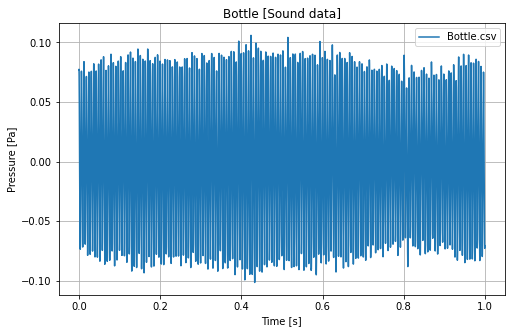

In [8]:
# Plot of data
fig, ax = plt.subplots(figsize=(8,5));
ax.plot(t2, p2, label='Bottle.csv')
ax.grid('true'); ax.legend()
ax.set_xlabel("Time [s]"), ax.set_ylabel("Pressure [Pa]")
ax.set_title("Bottle [Sound data]")
plt.show()

In [20]:
# Look at the FFT of bottle, again
# Data = p2, t2, 1 second of bottle data, at 12kHz sampling
# Units = [s], [Pa]
# Note, in Scipy FFT, [0:N//2] is the positive frequency space, generally what is of interest
N=t2.shape[0]; DT = t2[1] - t2[0]; T=t2[-1]-t2[0]
F=fft(p2)   # raw fourier spectrum, (absolute value)
f=fftfreq(N, DT)   ## the // operator I just takes the floor, e.g. truncates
df = f[1]-f[0]
print("Number of points: {}; time: {:.3f} [s];  max frequency: {:.3f} [Hz];  frequency resolution: {:.3f} Hz".format(
    N, T, f[N//2-1], df))


Number of points: 12000; time: 1.000 [s];  max frequency: 6001.400 [Hz];  frequency resolution: 1.000 Hz


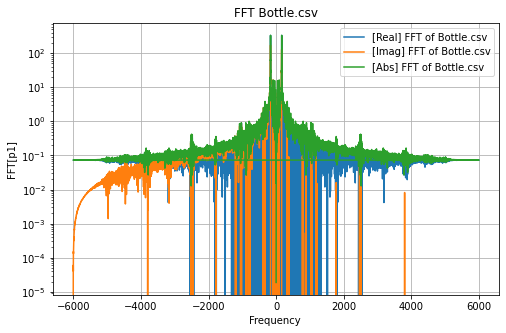

In [23]:
# Plot ALL the FFT components
# Note to maintain fourier transform idea, need to convert the upper frequencies 
# the (redundant) parts, into negative frequencies.  That is acomplished by fftfreq function
# 
fig, ax = plt.subplots(figsize=(8,5));
ax.plot(f, np.real(F), label='[Real] FFT of Bottle.csv')
ax.plot(f, np.imag(F), label='[Imag] FFT of Bottle.csv')
ax.plot(f, np.abs(F), label='[Abs] FFT of Bottle.csv')
ax.grid('true'); ax.legend(); ax.set_yscale("log")
ax.set_xlabel("Frequency "), ax.set_ylabel("FFT[p1]")
ax.set_title("FFT Bottle.csv")
plt.show()

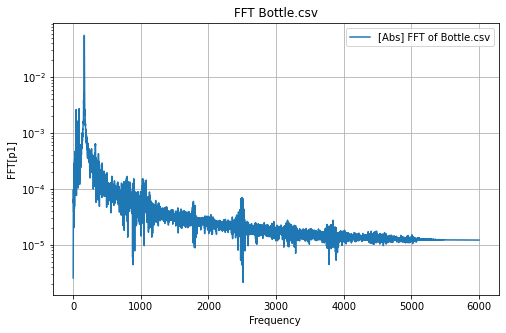

In [28]:
## Plot the Real FFT Energy (positive frequencies) removing the DC component at n=0
fig, ax = plt.subplots(figsize=(8,5));
ax.plot(f[1:N//2], 2*np.abs(F[1:N//2])/N, label='[Abs] FFT of Bottle.csv')
ax.grid('true'); ax.legend(); ax.set_yscale("log")
ax.set_xlabel("Frequency "), ax.set_ylabel("FFT[p1]")
ax.set_title("FFT Bottle.csv")
plt.show()

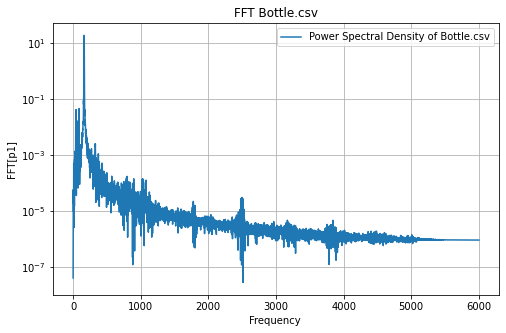

In [27]:
# Plot the Power Spectral Density
# Defined as X[k]^2
PSD = 2*np.abs(F[1:N//2])*np.abs(F[1:N//2])/N**2
fig, ax = plt.subplots(figsize=(8,5));
ax.plot(f[1:N//2], PSD, label='Power Spectral Density of Bottle.csv')
ax.grid('true'); ax.legend(); ax.set_yscale("log")
ax.set_xlabel("PSD of bottle "), ax.set_ylabel("FFT[p1]")
ax.set_title("FFT Bottle.csv")
plt.show()

In [32]:
# Parseval's Theroem, energy in x[n] vs X[k]
# sum x[n]^2 = (1/N) sum X[k]^2


print("integral y(t)*y(t) = {:.3f}".format(np.sum(p2*p2)))
print("integral PSD = {:.3f}".format(np.sum(PSD)))

integral y(t)*y(t) = 41.140
integral PSD = 41.140


In [34]:
import matplotlib

In [35]:
matplotlib.__version__

'3.3.2'